# Fits to Gorgo11 Sequential, Double-powerlaw model

Checking if we can get good fits to the sequential data.
We compare based on the full Kappa+ Mixture proportions. But maybe we could do something using the parameters of the obtained double-powerlaw model?


In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import os
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from experimentlauncher import ExperimentLauncher
from dataio import DataIO
import launchers_memorycurves_marginal_fi
import plots_experimental_data

# import matplotlib.animation as plt_anim
from mpl_toolkits.mplot3d import Axes3D

import re
import inspect
import imp

import utils
# import submitpbs
import load_experimental_data

In [23]:
%run reloader_gorgo11sequentialfitmixturemodel_triangle_random_fitmixturemodel_Msigmaxratioalpha_120615.py

Reloader data generated from  generator_gorgo11sequentialfitmixturemodel_triangle_random_fitmixturemodel_Msigmaxratioalpha_120615.py
Running  /nfs/data3/lmatthey/visual_working_mem/gorgo11_sequential_fitmixturemodel/reloader_gorgo11sequentialfitmixturemodel_triangle_random_fitmixturemodel_Msigmaxratioalpha_120615.py
Arguments: []

        Reload outputs run with the automatic parameter generator for PBS

        Should handle random sampling of the parameter space.
    
Reloader data generated from  generator_gorgo11sequentialfitmixturemodel_triangle_random_fitmixturemodel_Msigmaxratioalpha_120615.py
/nfs/data3/lmatthey/visual_working_mem/gorgo11_sequential_fitmixturemodel/gorgo11sequentialfitmixturemodel_triangle_random_fitmixturemodel_Msigmaxratioalpha_repetitions3_120615/gorgo11sequentialfitmixturemodel_triangle_random_fitmixturemodel_Msigmaxratioalpha_repetitions3_120615-launcher_do_fit_mixturemodels_sequential_alltrecall-56e08149-3843-4c20-b0f3-43e9ccf7bd89.npy
0.00%, -- left - 06

In [24]:
#### SETUP
#
plots_bestfits = True
plots_scatter3d = False

savefigs = True
savedata = True

dataio = DataIO(output_folder=generator_module.pbs_submission_infos['simul_out_dir'] + '/outputs/', label='global_' + dataset_infos['save_output_filename'])

#
#### /SETUP

=== FileIO ready: /nfs/data3/lmatthey/visual_working_mem/gorgo11_sequential_fitmixturemodel/gorgo11sequentialfitmixturemodel_triangle_random_fitmixturemodel_Msigmaxratioalpha_repetitions3_120615/outputs/global_plots_sequentialgorgo11_fitmixturemodel_Mratiosigmaxalphatrecall-<module>-3c7c47ce-3b00-41ac-8536-8badd25574d3 ===


In [25]:
# Extract data
T_space = data_pbs.loaded_data['datasets_list'][0]['T_space']

result_em_fits_collapsed_tr_flat = np.array(data_pbs.dict_arrays['result_em_fits_collapsed_tr']['results_flat'])
result_em_fits_collapsed_summary_flat = np.array(data_pbs.dict_arrays['result_em_fits_collapsed_summary']['results_flat'])
result_dist_gorgo11_sequ_collapsed_flat = np.array(data_pbs.dict_arrays['result_dist_gorgo11_sequ_collapsed']['results_flat'])
result_dist_gorgo11_sequ_collapsed_emmixt_KL_flat = np.array(data_pbs.dict_arrays['result_dist_gorgo11_sequ_collapsed_emmixt_KL']['results_flat'])

result_parameters_flat = np.array(data_pbs.dict_arrays['result_em_fits_collapsed_tr']['parameters_flat'])
all_repeats_completed = data_pbs.dict_arrays['result_em_fits_collapsed_tr']['repeats_completed']

all_args_arr = np.array(data_pbs.loaded_data['args_list'])

M_space = data_pbs.loaded_data['parameters_uniques']['M']
ratio_conj_space = data_pbs.loaded_data['parameters_uniques']['ratio_conj']
sigmax_space = data_pbs.loaded_data['parameters_uniques']['sigmax']
alpha_space = data_pbs.loaded_data['parameters_uniques']['alpha']

num_repetitions = generator_module.num_repetitions
parameter_names_sorted = data_pbs.dataset_infos['parameters']

def str_best_params(best_i, result_dist_to_use):
    return ' '.join(["%s %.4f" % (parameter_names_sorted[param_i], result_parameters_flat[best_i, param_i]) 
                     for param_i in xrange(len(parameter_names_sorted))]) + ' >> %f' % result_dist_to_use[best_i]


In [26]:
# Load ground truth
data_gorgo11_sequ = load_experimental_data.load_data_gorgo11_sequential(fit_mixture_model=True)

reloaded mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/Gorgoraptis_2011/em_gorgo_seq.pickle
Splitting data up: subject 1, 1 items, trecall 1, 26 datapoints
Splitting data up: subject 1, 2 items, trecall 1, 19 datapoints
Splitting data up: subject 1, 2 items, trecall 2, 31 datapoints
Splitting data up: subject 1, 3 items, trecall 1, 26 datapoints
Splitting data up: subject 1, 3 items, trecall 2, 23 datapoints
Splitting data up: subject 1, 3 items, trecall 3, 26 datapoints
Splitting data up: subject 1, 4 items, trecall 1, 24 datapoints
Splitting data up: subject 1, 4 items, trecall 2, 21 datapoints
Splitting data up: subject 1, 4 items, trecall 3, 29 datapoints
Splitting data up: subject 1, 4 items, trecall 4, 26 datapoints
Splitting data up: subject 1, 5 items, trecall 1, 23 datapoints
Splitting data up: subject 1, 5 items, trecall 2, 26 datapoints
Splitting data up: subject 1, 5 items, trecall 3, 21 datapoints
Splitting

In [27]:
## Filter everything with repeats_completed == num_repet
filter_data = all_repeats_completed == num_repetitions - 1
result_parameters_flat = result_parameters_flat[filter_data]

result_em_fits_collapsed_tr_flat = result_em_fits_collapsed_tr_flat[filter_data]
result_em_fits_collapsed_summary_flat = result_em_fits_collapsed_summary_flat[filter_data]
result_dist_gorgo11_sequ_collapsed_flat = result_dist_gorgo11_sequ_collapsed_flat[filter_data]
result_dist_gorgo11_sequ_collapsed_emmixt_KL_flat = result_dist_gorgo11_sequ_collapsed_emmixt_KL_flat[filter_data]

all_args_arr = all_args_arr[filter_data]
all_repeats_completed = all_repeats_completed[filter_data]

print "Size post-filter: ", result_parameters_flat.shape[0]

Size post-filter:  2832


In [28]:
# Compute lots of averages over the repetitions
result_em_fits_collapsed_tr_flat_avg = utils.nanmean(result_em_fits_collapsed_tr_flat, axis=-1)
result_em_fits_collapsed_summary_flat_avg = utils.nanmean(result_em_fits_collapsed_summary_flat, axis=-1)
result_dist_gorgo11_sequ_collapsed_flat_avg = utils.nanmean(result_dist_gorgo11_sequ_collapsed_flat, axis=-1)
result_dist_gorgo11_sequ_collapsed_emmixt_KL_flat_avg = utils.nanmean(result_dist_gorgo11_sequ_collapsed_emmixt_KL_flat, axis=-1)

result_dist_gorgo11_sequ_collapsed_flat_avg_overall = np.nansum(np.nansum(np.nansum(result_dist_gorgo11_sequ_collapsed_flat_avg, axis=-1), axis=-1), axis=-1)

## Showing obtained best fits

In [29]:
def plot_collapsed_modelfits(T_space, curr_result_emfits_collapsed_tr, labelplot='', dataio=None):
    f, ax = plt.subplots()
    for nitems_i, nitems in enumerate(T_space):
        ax = plots_experimental_data.plot_kappa_mean_error(T_space[:nitems], curr_result_emfits_collapsed_tr[..., 0][nitems_i, :nitems], 0.0*curr_result_emfits_collapsed_tr[..., 0][nitems_i, :nitems], title='model fit fig7 %s' % labelplot , ax=ax, label='%d items' % nitems, xlabel='T_recall')

    if dataio is not None:
        dataio.save_current_figure('bestfit_doublepowerlaw_%s_kappa_{label}_{unique_id}.pdf' % labelplot)

    _, ax_target = plt.subplots()
    _, ax_nontarget = plt.subplots()
    _, ax_random = plt.subplots()
    for nitems_i, nitems in enumerate(T_space):
        ax_target = plots_experimental_data.plot_emmixture_mean_error(T_space[:nitems], curr_result_emfits_collapsed_tr[..., 1][nitems_i, :nitems], curr_result_emfits_collapsed_tr[..., 1][nitems_i, :nitems]*0.0, title='Target model fit %s' % labelplot, ax=ax_target, label='%d items' % nitems, xlabel='T_recall')
        ax_nontarget = plots_experimental_data.plot_emmixture_mean_error(T_space[:nitems], curr_result_emfits_collapsed_tr[..., 2][nitems_i, :nitems], curr_result_emfits_collapsed_tr[..., 2][nitems_i, :nitems]*0.0, title='Nontarget model fit %s' % labelplot, ax=ax_nontarget, label='%d items' % nitems, xlabel='T_recall')
        ax_random = plots_experimental_data.plot_emmixture_mean_error(T_space[:nitems], curr_result_emfits_collapsed_tr[..., 3][nitems_i, :nitems], curr_result_emfits_collapsed_tr[..., 3][nitems_i, :nitems]*0.0, title='Random model fit %s' % labelplot, ax=ax_random, label='%d items' % nitems, xlabel='T_recall')

    if dataio is not None:
        plt.figure(ax_target.get_figure().number)
        dataio.save_current_figure('bestfit_doublepowerlaw_%s_mixttarget_{label}_{unique_id}.pdf' % labelplot)

        plt.figure(ax_nontarget.get_figure().number)
        dataio.save_current_figure('bestfit_doublepowerlaw_%s_mixtnontarget_{label}_{unique_id}.pdf' % labelplot)

        plt.figure(ax_random.get_figure().number)
        dataio.save_current_figure('bestfit_doublepowerlaw_%s_mixtrandom_{label}_{unique_id}.pdf' % labelplot)

In [30]:
# Let's show them
nb_best_points = 10

best_points_result_dist_gorgo11seq_all = np.argsort(result_dist_gorgo11_sequ_collapsed_flat_avg_overall)[:nb_best_points]

# Checking parameters
[str_best_params(best_ind, result_dist_gorgo11_sequ_collapsed_flat_avg_overall) for best_ind in best_points_result_dist_gorgo11seq_all]

['M 50.0000 ratio_conj 0.7200 sigmax 0.1267 alpha 0.7840 >> 6.088874',
 'M 61.0000 ratio_conj 0.8033 sigmax 0.1912 alpha 0.7564 >> 6.219983',
 'M 93.0000 ratio_conj 0.8710 sigmax 0.2502 alpha 0.7175 >> 9.273162',
 'M 201.0000 ratio_conj 0.8408 sigmax 0.4972 alpha 0.8181 >> 10.534150',
 'M 76.0000 ratio_conj 0.8421 sigmax 0.2533 alpha 0.8419 >> 10.798386',
 'M 149.0000 ratio_conj 0.8121 sigmax 0.3610 alpha 0.8805 >> 13.391476',
 'M 182.0000 ratio_conj 0.7912 sigmax 0.5134 alpha 0.9345 >> 13.649755',
 'M 121.0000 ratio_conj 0.6694 sigmax 0.4538 alpha 0.6582 >> 14.366398',
 'M 186.0000 ratio_conj 0.7742 sigmax 0.4572 alpha 0.8791 >> 15.471785',
 'M 175.0000 ratio_conj 0.6914 sigmax 0.5444 alpha 0.7536 >> 15.820472']

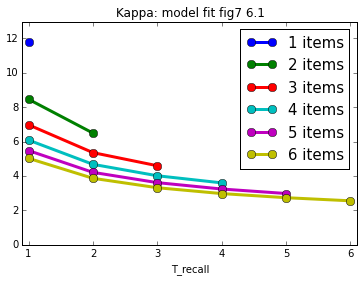

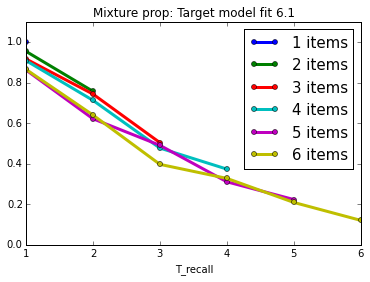

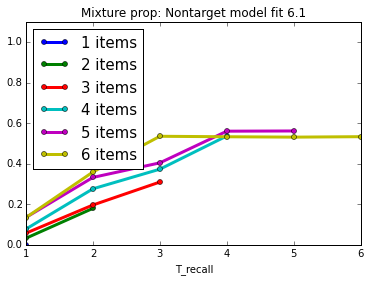

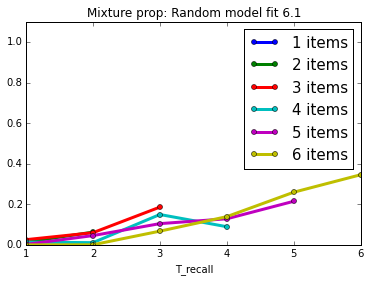

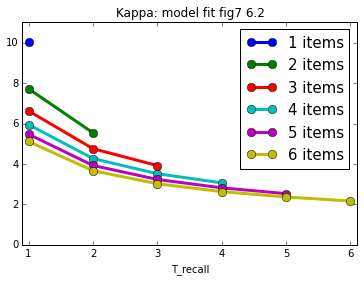

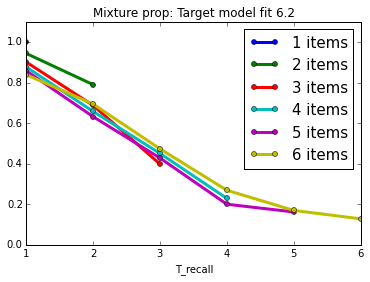

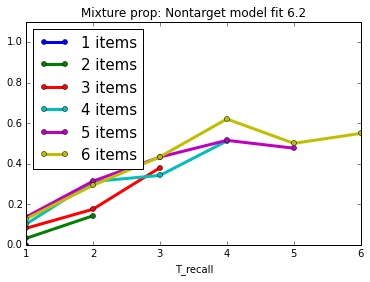

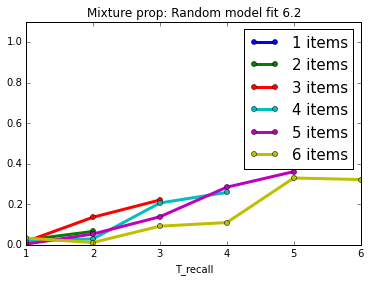

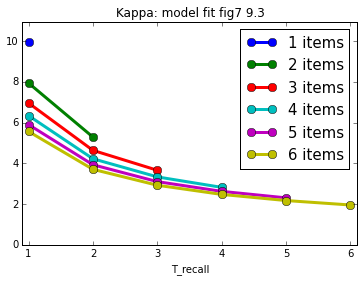

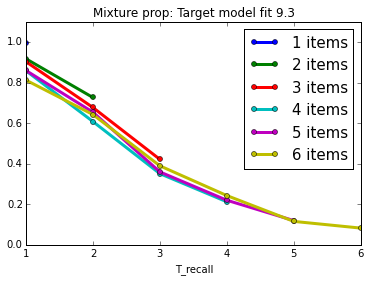

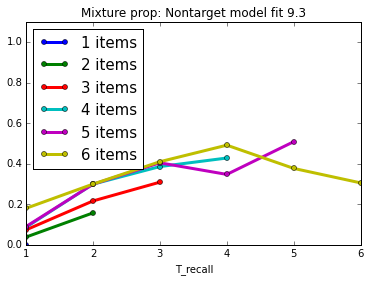

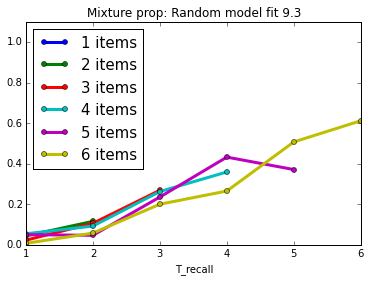

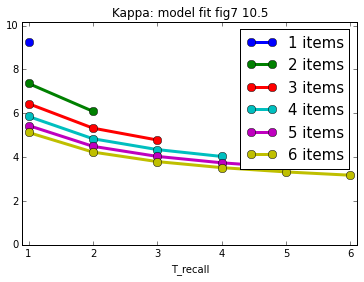

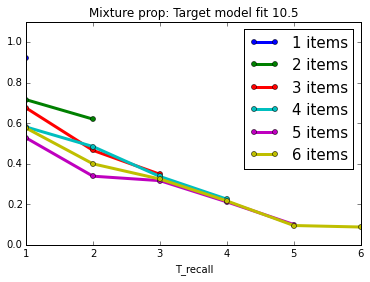

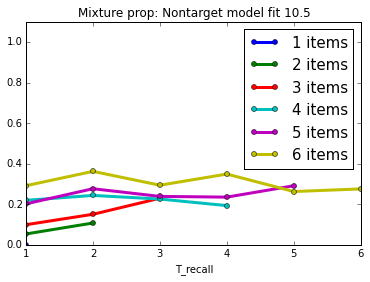

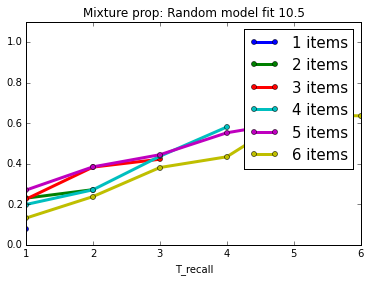

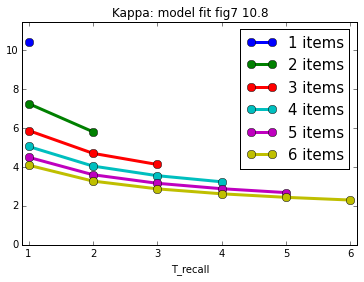

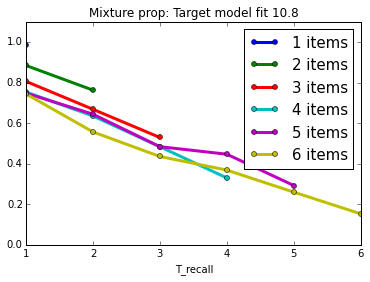

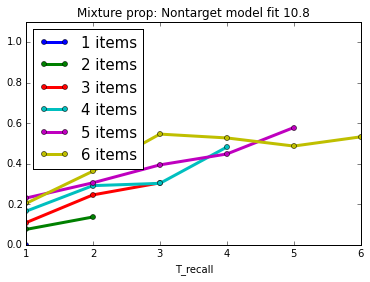

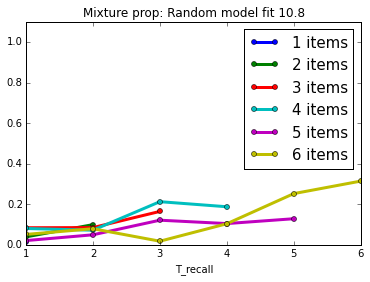

In [31]:
plt.close('all')
for best_point_i in best_points_result_dist_gorgo11seq_all[:5]:
    plot_collapsed_modelfits(T_space, 
                             result_em_fits_collapsed_tr_flat_avg[best_point_i], 
                             labelplot='%.1f' % result_dist_gorgo11_sequ_collapsed_flat_avg_overall[best_point_i], 
                             dataio=dataio)
plt.show()

## Looks actually quite close to the data!
The data plateau after Trecall 3 though, which we cannot seem to get.

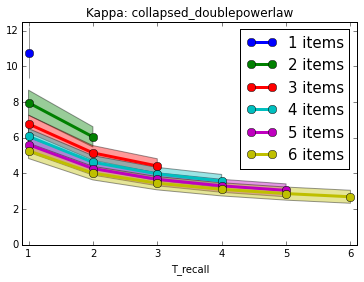

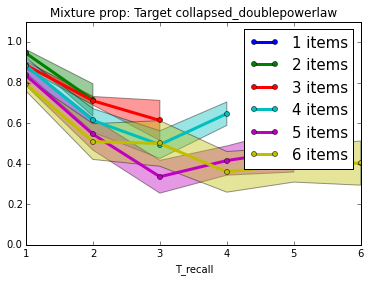

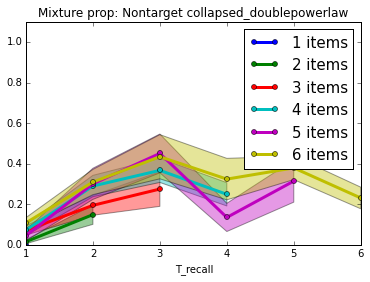

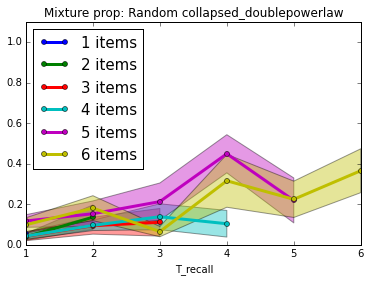

In [32]:
# Check the ground truth
plots_experimental_data.plots_gorgo11_sequential_collapsed(data_gorgo11_sequ)

# Playing with Plotly


In [33]:
import plotly
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import * 

In [34]:
# trace1 = Scatter3d(
#         x=[1,2,3],
#         y=[3,4,5],
#         z=[1,3,4],
#         mode='markers',
#         marker=Marker(
#             color=[1, 2, 3],
#             size=12,
#         )
#     )
# data = Data([trace1])
# py.iplot(data)

All right, that works! Now for some cool 3D plots showing all our points. Need to convert the plot_scatter3d() function from 
before into a Plotly one.

Shouldn't be too bad.

In [35]:
alpha_gridified, alpha_gridspace, alpha_midspace = utils.gridify(result_parameters_flat[:, 3], bins=20)

result_dist_gorgo11_sequ_collapsed_flat_avg_overall_log = np.log(result_dist_gorgo11_sequ_collapsed_flat_avg_overall)

col_min = np.min(result_dist_gorgo11_sequ_collapsed_flat_avg_overall)
col_max = np.max(result_dist_gorgo11_sequ_collapsed_flat_avg_overall)

col_min_log = np.min(result_dist_gorgo11_sequ_collapsed_flat_avg_overall_log)
col_max_log = np.max(result_dist_gorgo11_sequ_collapsed_flat_avg_overall_log)


scatter_data = result_parameters_flat[:, (0, 1, 2)]
scatter_color_log = np.log(result_dist_gorgo11_sequ_collapsed_flat_avg_overall)

trace1 = Scatter3d(
        x= scatter_data[:, 0],
        y= scatter_data[:, 1],
        z= scatter_data[:, 2],
        text= scatter_color_log,
        mode= 'markers',
        marker= Marker(
            color = scatter_color_log,
            size = 5,
            colorscale='Bluered',
            cmin=col_min_log,
            cmax=col_max_log,
            cauto=False
        )
    )
data = Data([trace1])
layout = Layout(
    scene=Scene(
        xaxis=XAxis(
            title=parameter_names_sorted[0],
        ),
        yaxis=YAxis(
            title=parameter_names_sorted[1],
        ),
        zaxis=ZAxis(
            title=parameter_names_sorted[2],
        )
    )
)
fig = Figure(data=data, layout=layout)
scatter3d_url = py.plot(fig)



In [36]:
from IPython.html import widgets # Widget definitions
from IPython.display import display # Used to display widgets in the notebook
from plotly.widgets import GraphWidget 

In [37]:
g = GraphWidget(scatter3d_url)

class shifter:
    def __init__(self):
        self.alpha_index = 0
        self.marker_size = 10
    
    def on_alpha_change(self, name, old_value, new_value):
        self.alpha_index = new_value
        
        if self.alpha_index > -1:            
            self.scatter_data = result_parameters_flat[alpha_gridified[self.alpha_index]][:, (0, 1, 2)]
            self.alpha_value = result_parameters_flat[alpha_gridified[self.alpha_index], 3]
            self.scatter_color = np.log(result_dist_gorgo11_sequ_collapsed_flat_avg_overall[alpha_gridified[self.alpha_index]])
            self.marker_size = 10
        else:
            self.scatter_data = result_parameters_flat[:, (0, 1, 2)]
            self.alpha_value = result_parameters_flat[:, 3]
            self.scatter_color = np.log(result_dist_gorgo11_sequ_collapsed_flat_avg_overall)
            self.marker_size = 7

        self.text = ['%s > %s' % (x[0], np.exp(x[1])) for x in zip(self.alpha_value, self.scatter_color)]
        self.replot()
        
    def replot(self):
        new_trace = Scatter3d(
            x= self.scatter_data[:, 0],
            y= self.scatter_data[:, 1],
            z= self.scatter_data[:, 2],
            text= self.text,
            mode= 'markers',
            marker= Marker(
                color = self.scatter_color,
                size = self.marker_size,
                colorscale='Bluered',
                cmin=col_min_log,
                cmax=col_max_log,
                cauto=False
            )
        )
        g.restyle({'x': [[]], 'y': [[]], 'z': [[]], 'marker':None})
        g.add_traces(new_trace)

p_slider = widgets.IntSlider(min=-1, max=alpha_midspace.size-1, value=-1)
p_slider.description = 'Alpha index'
# p_slider.value = -1

p_state = shifter()
p_slider.on_trait_change(p_state.on_alpha_change, 'value')
 

In [38]:
display(p_slider)
display(g)

# Showing Sequential collapsed fits

Collapsed trecall summed BIC:  10550.5811148
Collapsed nitems summed BIC:  10623.5753158


Collapsed double powerlaw BIC:  10346.8198627
Original non-collapsed BIC:  13750.786767
Collapsed double powerlaw LL:  -4278.37803744
Original non-collapsed LL:  -5916.56080199


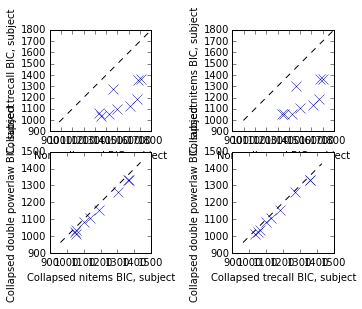

In [39]:
plots_experimental_data.plot_compare_bic_collapsed_mixture_model_sequential(data_gorgo11_sequ)

Todo:
- Check if fitting Paul's model with my optimal as initialisation does